In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('AAPL.csv')

In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Brand_Name',
       'Ticker', 'Industry_Tag', 'Country', 'Dividends', 'Stock Splits'],
      dtype='object')

In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [5]:
df = df.drop_duplicates(subset='date', keep='first').reset_index(drop=True)

In [6]:
# Create a new target column (target) that represents the next day’s close.
df['target'] = df['close'].shift(-1)

In [7]:
df.head()

,date,open,high,low,close,volume,brand_name,ticker,industry_tag,country,dividends,stock_splits,target
0,2010-01-04 05:00:00+00:00,6.469951,6.502387,6.438122,6.487534,493729600.0,apple,AAPL,technology,usa,0.0,0.0,6.498751
1,2010-01-05 05:00:00+00:00,6.505420,6.535431,6.464496,6.498751,601904800.0,apple,AAPL,technology,usa,0.0,0.0,6.395379
2,2010-01-06 05:00:00+00:00,6.498750,6.524518,6.388710,6.395379,552160000.0,apple,AAPL,technology,usa,0.0,0.0,6.383556
3,2010-01-07 05:00:00+00:00,6.419024,6.426603,6.337176,6.383556,477131200.0,apple,AAPL,technology,usa,0.0,0.0,6.425995
4,2010-01-08 05:00:00+00:00,6.375067,6.426602,6.337478,6.425995,447610800.0,apple,AAPL,technology,usa,0.0,0.0,6.369311


In [8]:
# Delete the last row using drop()
# To modify the DataFrame in place, set inplace=True
df.drop(df.index[-1], inplace=True)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [11]:
len(df_train), len(df_val), len(df_test)

(2334, 779, 779)

In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
y_train = df_train.target.values
y_val = df_val.target.values
y_test = df_test.target.values

del df_train['target']
del df_val['target']
del df_test['target']

In [14]:
from sklearn.linear_model import Lasso

In [16]:
# Baseline solution
base = ['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits']

In [17]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [20]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
X_test = prepare_X(df_test)


In [21]:
lasso_regressor = Lasso(alpha=1.0)
lasso_regressor.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.683e+03, tolerance: 1.177e+03
  model = cd_fast.enet_coordinate_descent(


,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [22]:
y_pred = lasso_regressor.predict(X_val)

In [24]:
# RMSE
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)


In [25]:
rmse = rmse(y_val, y_pred)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 2.031908677266857


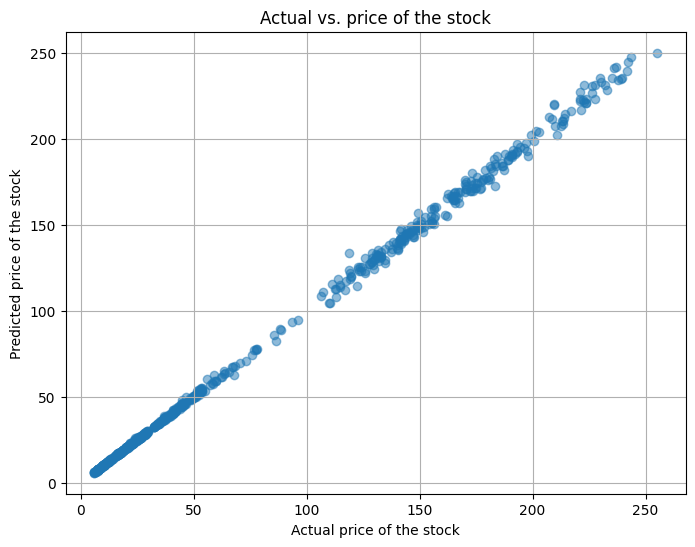

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()